Program to create Simple Linear Regression model using Scikit Learn to Admission Dataset and analyze the output

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
adm = pd.read_csv("Admission_Predict.csv")
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#adm.describe()

In [4]:
#adm.info()

In [5]:
#adm.isnull().sum()

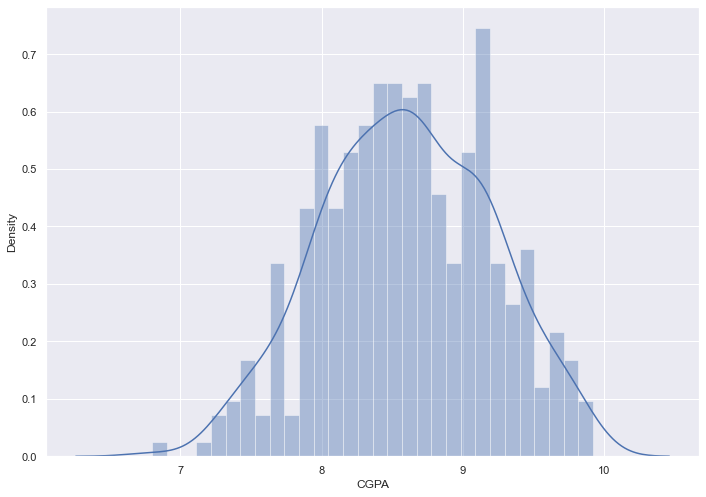

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(adm['CGPA'], bins=30)
plt.show()

In [7]:
#sns.pairplot(adm)

In [8]:
#sns.heatmap(adm.corr(), annot=True)

Text(0, 0.5, 'Chance of Admit ')

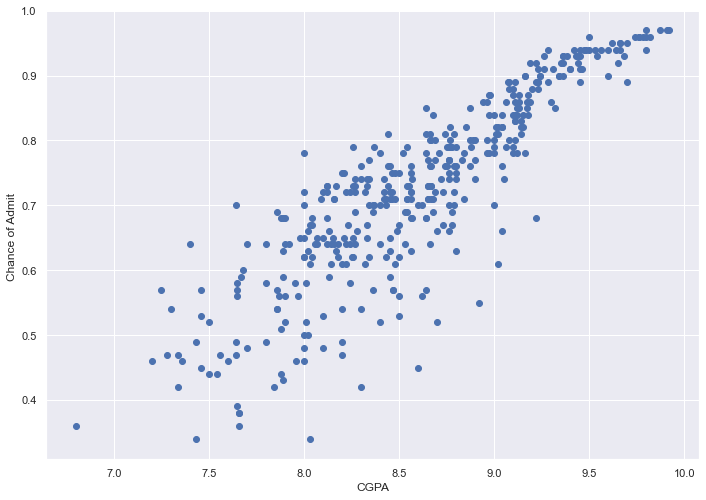

In [9]:
X = adm['CGPA'].values.reshape(-1,1)
Y = adm['Chance of Admit '].values.reshape(-1,1)
plt.scatter(X,Y, marker='o')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')

In [10]:
from sklearn.model_selection import train_test_split
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(400, 1)
(320, 1)
(80, 1)
(320, 1)
(80, 1)


In [11]:
lin_model=LinearRegression()
lin_model.fit(X_train, Y_train, sample_weight=None)

LinearRegression()

In [12]:
print(lin_model.intercept_)
print(lin_model.coef_)

[-1.12312401]
[[0.21455941]]


In [13]:
y_pred = lin_model.predict(X_test)
print(y_pred.flatten())

[0.80147391 0.8036195  0.4774892  0.6577191  0.43243172 0.76285321
 0.70492217 0.56331296 0.64055435 0.67059267 0.70706777 0.4774892
 0.59335128 0.83151223 0.8422402  0.83365782 0.7328149  0.70921336
 0.6233896  0.73710608 0.61909841 0.94093752 0.75641643 0.56974974
 0.83365782 0.82936663 0.81649307 0.59335128 0.74997965 0.81220188
 0.70921336 0.90017124 0.69204861 0.63626316 0.71350455 0.71350455
 0.77358118 0.90875361 0.59764247 0.67917504 0.68990301 0.95810228
 0.95381109 0.7306693  0.57618653 0.75641643 0.97097584 0.88515208
 0.60193366 0.80791069 0.67917504 0.61480722 0.74139727 0.60193366
 0.67059267 0.78216356 0.76285321 0.56974974 0.78645475 0.84653138
 0.59549687 0.82936663 0.94737431 0.61480722 0.73496049 0.5869145
 0.61909841 0.71350455 0.64484554 0.7328149  0.85940495 0.88086089
 0.52898346 0.90446242 0.76499881 0.66201029 0.8400946  0.90660802
 0.62553519 0.77572678]


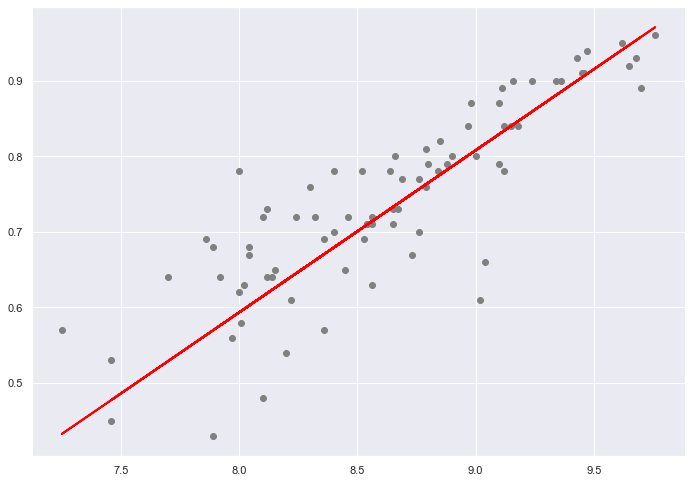

In [14]:
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
plt.scatter(X_test, Y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [15]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
accuracy = lin_model.score(X_test, Y_test)
print(accuracy)

Mean Squared Error: 0.004515983608418231
Root Mean Squared Error: 0.06720106850652176
0.692319290858918
